## Part A. Preliminaries

## 3. Acquiring dataset

In [1]:
import pandas as pd #data loader library
import matplotlib.pyplot as plt #graph visualization library
import numpy as np
#iris dataset을 얻고 class별로 분리해놓는다.
df = pd.read_csv('./iris/iris.data', names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])
se=df[df['class'] =='Iris-setosa']
ve=df[df['class']=='Iris-versicolor']
vi=df[df['class']=='Iris-virginica']

## Part B. Iris classification using text data

## 2.

### Sepal Length - Sepal Width

- The distribution of the attributes

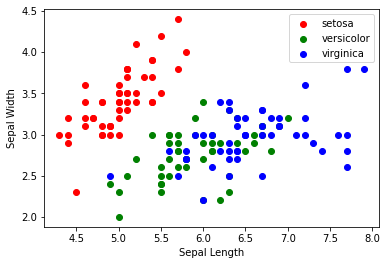

In [2]:
#x축 : sepal length
#y축 : sepal width
#두 attributes 쌍의 distribution을 그린다.
plt.scatter(se['sepal length'], se['sepal width'], label='setosa' ,color='red')
plt.scatter(ve['sepal length'], ve['sepal width'], label='versicolor', color='green')
plt.scatter(vi['sepal length'], vi['sepal width'], label='virginica', color='blue')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

첫 번째 boundary : y = 0.8x -1.3
두 번째 boundary : y = 1.3x -5.2
cost :  27


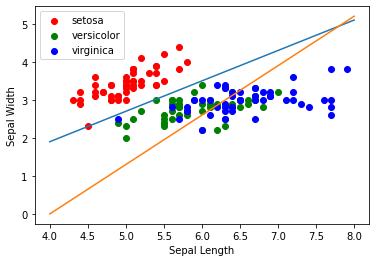

In [3]:
#for문을 돌려 2개의 optimal한 decision boundary를 찾는다.
#첫 번째 decision boundary : 직선 y = ax + b
#두 번째 decision boundary : 직선 y = cx + d
#cost는 misclassification된 instance 개수이다.
final_a = 0
final_b = 0
cost_ab = 150

a= -2.0
for i in range(40):
    a += 0.1
    a = round(a,1)
    b= -6.0
    for j in range(120):
        b += 0.1
        b = round(b,1)
        se_ve = df[df['class']!='Iris-virginica']
        boundary= a * se_ve['sepal length'] + b
        se_p = se_ve[se_ve['sepal width'] >= boundary]
        se_tp = se_p[se_p['class'] =='Iris-setosa']
        
        ve_p = se_ve[se_ve['sepal width'] < boundary]
        ve_tp = ve_p[ve_p['class'] =='Iris-versicolor']

        n_se_fp = len(se_p)-len(se_tp)
        n_ve_fp = len(ve_p)-len(ve_tp)
        cost = n_se_fp + n_ve_fp
        
        if cost < cost_ab :
            cost_ab = cost
            final_a = a
            final_b = b

final_c = 0
final_d = 0
cost_cd = 150

c= -2.0
for i in range(40):
    c += 0.1
    c = round(c,1)
    d= -6.0
    for j in range(120):
        d += 0.1
        d = round(d,1)
        
        ve_vi = df[df['class']!='Iris-setosa']
        boundary= c * ve_vi['sepal length'] + d
        ve_p = ve_vi[ve_vi['sepal width'] >= boundary]
        ve_tp = ve_p[ve_p['class'] =='Iris-versicolor']
        
        vi_p = ve_vi[ve_vi['sepal width'] < boundary]
        vi_tp = vi_p[vi_p['class'] =='Iris-virginica']
        
        n_ve_fp = len(ve_p)-len(ve_tp)
        n_vi_fp = len(vi_p)-len(vi_tp)
        cost = n_ve_fp + n_vi_fp
        if cost < cost_cd :
            cost_cd = cost
            final_c = c
            final_d = d

if final_b < 0 : print("첫 번째 boundary : y = " + str(final_a) +"x "+str(final_b))
elif final_b == 0 :print("첫 번째 boundary : y = " + str(final_a) +"x")
else : print("첫 번째 boundary : y = " + str(final_a) +"x +"+str(final_b))
if final_d < 0 : print("두 번째 boundary : y = " + str(final_c) +"x "+str(final_d))
elif final_d == 0 :print("두 번째 boundary : y = " + str(final_c) +"x")
else : print("두 번째 boundary : y = " + str(final_c) +"x +"+str(final_d))
print("cost : ", str(cost_ab + cost_cd))

#두 개의 decision boundary가 표시된 distribution을 그린다.
plt.scatter(se['sepal length'], se['sepal width'], label='setosa' ,color='red')
plt.scatter(ve['sepal length'], ve['sepal width'], label='versicolor', color='green')
plt.scatter(vi['sepal length'], vi['sepal width'], label='virginica', color='blue')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
x = np.array([4,8])
plt.plot(x, final_a*x+final_b)
plt.plot(x, final_c*x+final_d)
plt.show()

### Sepal Length - Petal Length

- The distribution of the attributes

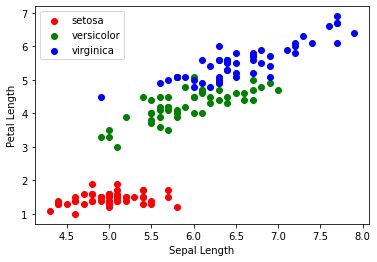

In [4]:
#x축 : sepal length
#y축 : petal length
#두 attributes 쌍의 distribution을 그린다.
plt.scatter(se['sepal length'], se['petal length'], label='setosa' ,color='red')
plt.scatter(ve['sepal length'], ve['petal length'], label='versicolor', color='green')
plt.scatter(vi['sepal length'], vi['petal length'], label='virginica', color='blue')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()
plt.show()

첫 번째 boundary : y = 0.0x +2.0
두 번째 boundary : y = 0.3x +2.9
cost :  4


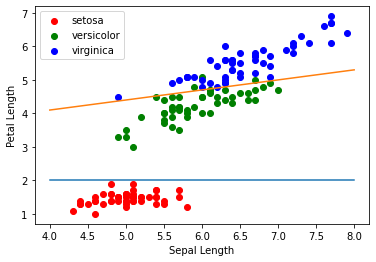

In [5]:
#for문을 돌려 2개의 optimal한 decision boundary를 찾는다.
#첫 번째 decision boundary : 직선 y = ax + b
#두 번째 decision boundary : 직선 y = cx + d
#cost는 misclassification된 instance 개수이다.
final_a = 0
final_b = 0
cost_ab = 150

a= -0.1
for i in range(10):
    a += 0.1
    a = round(a,1)
    b= -6.0
    for j in range(120):
        b += 0.1
        b = round(b,1)
        se_ve = df[df['class']!='Iris-virginica']
        boundary= a * se_ve['sepal length'] + b
        se_p = se_ve[se_ve['petal length'] < boundary]
        se_tp = se_p[se_p['class'] =='Iris-setosa']
        
        ve_p = se_ve[se_ve['petal length'] >= boundary]
        ve_tp = ve_p[ve_p['class'] =='Iris-versicolor']
        
        n_se_fp = len(se_p)-len(se_tp)
        n_ve_fp = len(ve_p)-len(ve_tp)
        cost = n_se_fp + n_ve_fp
        if cost < cost_ab :
            cost_ab = cost
            final_a = a
            final_b = b


final_c = 0
final_d = 0
cost_cd = 150

c= -0.1
for i in range(10):
    c += 0.1
    c = round(c,1)
    d= -6.0
    for j in range(120):
        d += 0.1
        d = round(d,1)
        
        ve_vi = df[df['class']!='Iris-setosa']
        boundary= c * ve_vi['sepal length'] + d
        ve_p = ve_vi[ve_vi['petal length'] < boundary]
        ve_tp = ve_p[ve_p['class'] =='Iris-versicolor']
        
        vi_p = ve_vi[ve_vi['petal length'] >= boundary]
        vi_tp = vi_p[vi_p['class'] =='Iris-virginica']
        
        n_ve_fp = len(ve_p)-len(ve_tp)
        n_vi_fp = len(vi_p)-len(vi_tp)
        cost = n_ve_fp + n_vi_fp
        if cost < cost_cd :
            cost_cd = cost
            final_c = c
            final_d = d

if final_b < 0 : print("첫 번째 boundary : y = " + str(final_a) +"x "+str(final_b))
elif final_b == 0 :print("첫 번째 boundary : y = " + str(final_a) +"x")
else : print("첫 번째 boundary : y = " + str(final_a) +"x +"+str(final_b))
if final_d < 0 : print("두 번째 boundary : y = " + str(final_c) +"x "+str(final_d))
elif final_d == 0 :print("두 번째 boundary : y = " + str(final_c) +"x")
else : print("두 번째 boundary : y = " + str(final_c) +"x +"+str(final_d))
print("cost : ", str(cost_ab + cost_cd))

#두 개의 decision boundary가 표시된 distribution을 그린다.
plt.scatter(se['sepal length'], se['petal length'], label='setosa' ,color='red')
plt.scatter(ve['sepal length'], ve['petal length'], label='versicolor', color='green')
plt.scatter(vi['sepal length'], vi['petal length'], label='virginica', color='blue')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
x = np.array([4,8])
plt.plot(x, final_a*x+final_b)
plt.plot(x, final_c*x+final_d)
plt.legend()
plt.show()

### Sepal Length - Petal Width

- The distribution of the attributes

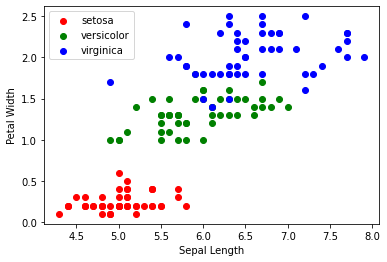

In [6]:
#x축 : sepal length
#y축 : petal width
#두 attributes 쌍의 distribution을 그린다.
plt.scatter(se['sepal length'], se['petal width'], label='setosa' ,color='red')
plt.scatter(ve['sepal length'], ve['petal width'], label='versicolor', color='green')
plt.scatter(vi['sepal length'], vi['petal width'], label='virginica', color='blue')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

첫 번째 boundary : y = 0.0x +0.7
두 번째 boundary : y = 0.0x +1.7
cost :  6


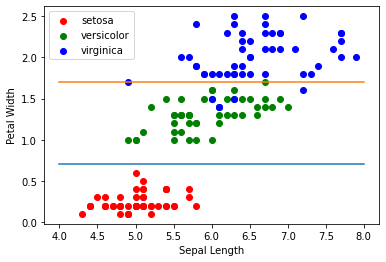

In [7]:
#for문을 돌려 2개의 optimal한 decision boundary를 찾는다.
#첫 번째 decision boundary : 직선 y = ax + b
#두 번째 decision boundary : 직선 y = cx + d
#cost는 misclassification된 instance 개수이다.
final_a = 0
final_b = 0
cost_ab = 150

a= -0.1
for i in range(10):
    a += 0.1
    a = round(a,1)
    b= -6.0
    for j in range(120):
        b += 0.1
        b = round(b,1)
        se_ve = df[df['class']!='Iris-virginica']
        boundary= a * se_ve['sepal length'] + b
        se_p = se_ve[se_ve['petal width'] < boundary]
        se_tp = se_p[se_p['class'] =='Iris-setosa']
        
        ve_p = se_ve[se_ve['petal width'] >= boundary]
        ve_tp = ve_p[ve_p['class'] =='Iris-versicolor']
        
        n_se_fp = len(se_p)-len(se_tp)
        n_ve_fp = len(ve_p)-len(ve_tp)
        cost = n_se_fp + n_ve_fp
        if cost < cost_ab :
            cost_ab = cost
            final_a = a
            final_b = b


final_c = 0
final_d = 0
cost_cd = 150

c= -0.1
for i in range(10):
    c += 0.1
    c = round(c,1)
    d= -6.0
    for j in range(120):
        d += 0.1
        d = round(d,1)
        
        ve_vi = df[df['class']!='Iris-setosa']
        boundary= c * ve_vi['sepal length'] + d
        ve_p = ve_vi[ve_vi['petal width'] < boundary]
        ve_tp = ve_p[ve_p['class'] =='Iris-versicolor']
        
        vi_p = ve_vi[ve_vi['petal width'] >= boundary]
        vi_tp = vi_p[vi_p['class'] =='Iris-virginica']
        n_ve_fp = len(ve_p)-len(ve_tp)
        n_vi_fp = len(vi_p)-len(vi_tp)
        cost = n_ve_fp + n_vi_fp
        if cost < cost_cd :
            cost_cd = cost
            final_c = c
            final_d = d

if final_b < 0 : print("첫 번째 boundary : y = " + str(final_a) +"x "+str(final_b))
elif final_b == 0 :print("첫 번째 boundary : y = " + str(final_a) +"x")
else : print("첫 번째 boundary : y = " + str(final_a) +"x +"+str(final_b))
if final_d < 0 : print("두 번째 boundary : y = " + str(final_c) +"x "+str(final_d))
elif final_d == 0 :print("두 번째 boundary : y = " + str(final_c) +"x")
else : print("두 번째 boundary : y = " + str(final_c) +"x +"+str(final_d))
print("cost : ", str(cost_ab + cost_cd))

#두 개의 decision boundary가 표시된 distribution을 그린다.
plt.scatter(se['sepal length'], se['petal width'], label='setosa' ,color='red')
plt.scatter(ve['sepal length'], ve['petal width'], label='versicolor', color='green')
plt.scatter(vi['sepal length'], vi['petal width'], label='virginica', color='blue')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
x = np.array([4,8])
plt.plot(x, final_a*x+final_b)
plt.plot(x, final_c*x+final_d)
plt.legend()
plt.show()

### Sepal Width - Petal Length

- The distribution of the attributes

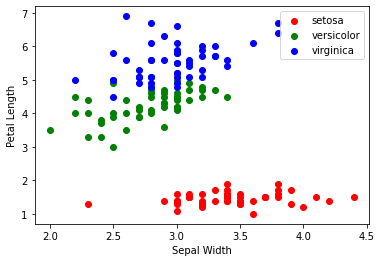

In [8]:
#x축 : sepal width
#y축 : petal length
#두 attributes 쌍의 distribution을 그린다.
plt.scatter(se['sepal width'], se['petal length'], label='setosa' ,color='red')
plt.scatter(ve['sepal width'], ve['petal length'], label='versicolor', color='green')
plt.scatter(vi['sepal width'], vi['petal length'], label='virginica', color='blue')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Length')
plt.legend()
plt.show()

첫 번째 boundary : y = 0.0x +2.0
두 번째 boundary : y = 0.1x +4.5
cost :  6


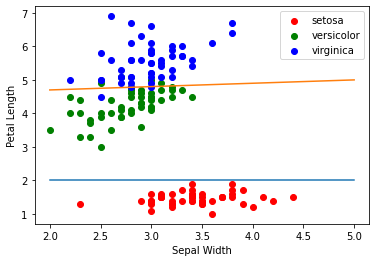

In [9]:
#for문을 돌려 2개의 optimal한 decision boundary를 찾는다.
#첫 번째 decision boundary : 직선 y = ax + b
#두 번째 decision boundary : 직선 y = cx + d
#cost는 misclassification된 instance 개수이다.
final_a = 0
final_b = 0
cost_ab = 150

a= -0.1
for i in range(10):
    a += 0.1
    a = round(a,1)
    b= -6.0
    for j in range(120):
        b += 0.1
        b = round(b,1)
        se_ve = df[df['class']!='Iris-virginica']
        boundary= a * se_ve['sepal width'] + b
        se_p = se_ve[se_ve['petal length'] < boundary]
        se_tp = se_p[se_p['class'] =='Iris-setosa']
        
        ve_p = se_ve[se_ve['petal length'] >= boundary]
        ve_tp = ve_p[ve_p['class'] =='Iris-versicolor']
        
        n_se_fp = len(se_p)-len(se_tp)
        n_ve_fp = len(ve_p)-len(ve_tp)
        cost = n_se_fp + n_ve_fp
        if cost < cost_ab :
            cost_ab = cost
            final_a = a
            final_b = b


final_c = 0
final_d = 0
cost_cd = 150

c= -0.1
for i in range(10):
    c += 0.1
    c = round(c,1)
    d= -6.0
    for j in range(120):
        d += 0.1
        d = round(d,1)
        
        ve_vi = df[df['class']!='Iris-setosa']
        boundary= c * ve_vi['sepal width'] + d
        ve_p = ve_vi[ve_vi['petal length'] < boundary]
        ve_tp = ve_p[ve_p['class'] =='Iris-versicolor']
        
        vi_p = ve_vi[ve_vi['petal length'] >= boundary]
        vi_tp = vi_p[vi_p['class'] =='Iris-virginica']
        n_ve_fp = len(ve_p)-len(ve_tp)
        n_vi_fp = len(vi_p)-len(vi_tp)
        cost = n_ve_fp + n_vi_fp
        if cost < cost_cd :
            cost_cd = cost
            final_c = c
            final_d = d

if final_b < 0 : print("첫 번째 boundary : y = " + str(final_a) +"x "+str(final_b))
elif final_b == 0 :print("첫 번째 boundary : y = " + str(final_a) +"x")
else : print("첫 번째 boundary : y = " + str(final_a) +"x +"+str(final_b))
if final_d < 0 : print("두 번째 boundary : y = " + str(final_c) +"x "+str(final_d))
elif final_d == 0 :print("두 번째 boundary : y = " + str(final_c) +"x")
else : print("두 번째 boundary : y = " + str(final_c) +"x +"+str(final_d))
print("cost : ", str(cost_ab + cost_cd))

#두 개의 decision boundary가 표시된 distribution을 그린다.
plt.scatter(se['sepal width'], se['petal length'], label='setosa' ,color='red')
plt.scatter(ve['sepal width'], ve['petal length'], label='versicolor', color='green')
plt.scatter(vi['sepal width'], vi['petal length'], label='virginica', color='blue')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Length')
x = np.array([2,5])
plt.plot(x, final_a*x+final_b)
plt.plot(x, final_c*x+final_d)
plt.legend()
plt.show()

### Sepal Width - Petal Width

- The distribution of the attributes

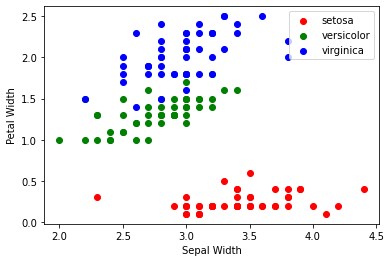

In [10]:
#x축 : sepal width
#y축 : petal width
#두 attributes 쌍의 distribution을 그린다.
plt.scatter(se['sepal width'], se['petal width'], label='setosa' ,color='red')
plt.scatter(ve['sepal width'], ve['petal width'], label='versicolor', color='green')
plt.scatter(vi['sepal width'], vi['petal width'], label='virginica', color='blue')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

첫 번째 boundary : y = 0.0x +0.7
두 번째 boundary : y = 0.2x +1.1
cost :  5


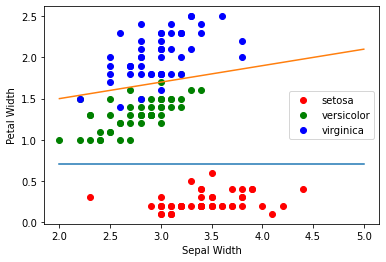

In [11]:
#for문을 돌려 2개의 optimal한 decision boundary를 찾는다.
#첫 번째 decision boundary : 직선 y = ax + b
#두 번째 decision boundary : 직선 y = cx + d
#cost는 misclassification된 instance 개수이다.
final_a = 0
final_b = 0
cost_ab = 150

a= -0.1
for i in range(10):
    a += 0.1
    a = round(a,1)
    b= -6.0
    for j in range(120):
        b += 0.1
        b = round(b,1)
        se_ve = df[df['class']!='Iris-virginica']
        boundary= a * se_ve['sepal width'] + b
        se_p = se_ve[se_ve['petal width'] < boundary]
        se_tp = se_p[se_p['class'] =='Iris-setosa']
        
        ve_p = se_ve[se_ve['petal width'] >= boundary]
        ve_tp = ve_p[ve_p['class'] =='Iris-versicolor']
        
        n_se_fp = len(se_p)-len(se_tp)
        n_ve_fp = len(ve_p)-len(ve_tp)
        cost = n_se_fp + n_ve_fp
        if cost < cost_ab :
            cost_ab = cost
            final_a = a
            final_b = b


final_c = 0
final_d = 0
cost_cd = 150

c= -0.1
for i in range(10):
    c += 0.1
    c = round(c,1)
    d= -6.0
    for j in range(120):
        d += 0.1
        d = round(d,1)
        
        ve_vi = df[df['class']!='Iris-setosa']
        boundary= c * ve_vi['sepal width'] + d
        ve_p = ve_vi[ve_vi['petal width'] < boundary]
        ve_tp = ve_p[ve_p['class'] =='Iris-versicolor']
        
        vi_p = ve_vi[ve_vi['petal width'] >= boundary]
        vi_tp = vi_p[vi_p['class'] =='Iris-virginica']
        n_ve_fp = len(ve_p)-len(ve_tp)
        n_vi_fp = len(vi_p)-len(vi_tp)
        cost = n_ve_fp + n_vi_fp
        if cost < cost_cd :
            cost_cd = cost
            final_c = c
            final_d = d

if final_b < 0 : print("첫 번째 boundary : y = " + str(final_a) +"x "+str(final_b))
elif final_b == 0 :print("첫 번째 boundary : y = " + str(final_a) +"x")
else : print("첫 번째 boundary : y = " + str(final_a) +"x +"+str(final_b))
if final_d < 0 : print("두 번째 boundary : y = " + str(final_c) +"x "+str(final_d))
elif final_d == 0 :print("두 번째 boundary : y = " + str(final_c) +"x")
else : print("두 번째 boundary : y = " + str(final_c) +"x +"+str(final_d))
print("cost : ", str(cost_ab + cost_cd))

#두 개의 decision boundary가 표시된 distribution을 그린다.
plt.scatter(se['sepal width'], se['petal width'], label='setosa' ,color='red')
plt.scatter(ve['sepal width'], ve['petal width'], label='versicolor', color='green')
plt.scatter(vi['sepal width'], vi['petal width'], label='virginica', color='blue')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
x = np.array([2,5])
plt.plot(x, final_a*x+final_b)
plt.plot(x, final_c*x+final_d)
plt.legend()
plt.show()

### Petal Length - Petal Width

- The distribution of the attributes

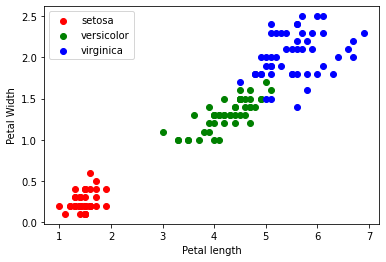

In [12]:
#x축 : petal length
#y축 : petal width
#두 attributes 쌍의 distribution을 그린다.
plt.scatter(se['petal length'], se['petal width'], label='setosa' ,color='red')
plt.scatter(ve['petal length'], ve['petal width'], label='versicolor', color='green')
plt.scatter(vi['petal length'], vi['petal width'], label='virginica', color='blue')
plt.xlabel('Petal length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

첫 번째 boundary : y = -0.9x +2.2
두 번째 boundary : y = -0.4x +3.5
cost :  3


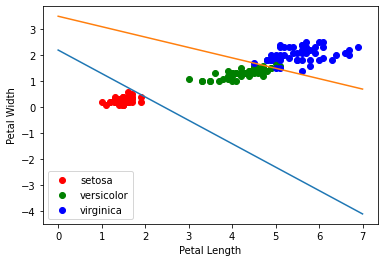

In [13]:
#for문을 돌려 2개의 optimal한 decision boundary를 찾는다.
#첫 번째 decision boundary : 직선 y = ax + b
#두 번째 decision boundary : 직선 y = cx + d
#cost는 misclassification된 instance 개수이다.
final_a = 0
final_b = 0
cost_ab = 150

a= -1.0
for i in range(10):
    a += 0.1
    a = round(a,1)
    b= -6.0
    for j in range(120):
        b += 0.1
        b = round(b,1)
        se_ve = df[df['class']!='Iris-virginica']
        boundary= a * se_ve['petal length'] + b
        se_p = se_ve[se_ve['petal width'] < boundary]
        se_tp = se_p[se_p['class'] =='Iris-setosa']
        
        ve_p = se_ve[se_ve['petal width'] >= boundary]
        ve_tp = ve_p[ve_p['class'] =='Iris-versicolor']
        
        n_se_fp = len(se_p)-len(se_tp)
        n_ve_fp = len(ve_p)-len(ve_tp)
        cost = n_se_fp + n_ve_fp
        if cost < cost_ab :
            cost_ab = cost
            final_a = a
            final_b = b


final_c = 0
final_d = 0
cost_cd = 150

c= -1.0
for i in range(10):
    c += 0.1
    c = round(c,1)
    d= -6.0
    for j in range(120):
        d += 0.1
        d = round(d,1)
        
        ve_vi = df[df['class']!='Iris-setosa']
        boundary= c * ve_vi['petal length'] + d
        ve_p = ve_vi[ve_vi['petal width'] < boundary]
        ve_tp = ve_p[ve_p['class'] =='Iris-versicolor']
        
        vi_p = ve_vi[ve_vi['petal width'] >= boundary]
        vi_tp = vi_p[vi_p['class'] =='Iris-virginica']
        n_ve_fp = len(ve_p)-len(ve_tp)
        n_vi_fp = len(vi_p)-len(vi_tp)
        cost = n_ve_fp + n_vi_fp
        if cost < cost_cd :
            cost_cd = cost
            final_c = c
            final_d = d

if final_b < 0 : print("첫 번째 boundary : y = " + str(final_a) +"x "+str(final_b))
elif final_b == 0 :print("첫 번째 boundary : y = " + str(final_a) +"x")
else : print("첫 번째 boundary : y = " + str(final_a) +"x +"+str(final_b))
if final_d < 0 : print("두 번째 boundary : y = " + str(final_c) +"x "+str(final_d))
elif final_d == 0 :print("두 번째 boundary : y = " + str(final_c) +"x")
else : print("두 번째 boundary : y = " + str(final_c) +"x +"+str(final_d))
print("cost : ", str(cost_ab + cost_cd))

#두 개의 decision boundary가 표시된 distribution을 그린다.
plt.scatter(se['petal length'], se['petal width'], label='setosa' ,color='red')
plt.scatter(ve['petal length'], ve['petal width'], label='versicolor', color='green')
plt.scatter(vi['petal length'], vi['petal width'], label='virginica', color='blue')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
x = np.array([0,7])
plt.plot(x, final_a*x+final_b)
plt.plot(x, final_c*x+final_d)
plt.legend()
plt.show()